# Data Preparation

In [1]:
#import libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Loading Dataset

In [2]:
# https://archive-beta.ics.uci.edu/ml/datasets/cervical+cancer+risk+factors
"""
The dataset was collected at 'Hospital Universitario de Caracas' in Caracas, Venezuela.
The dataset comprises demographic information, habits, and historic medical records of 858 patients.
Several patients decided not to answer some of the questions because of privacy concerns (missing values).
"""

rf = pd.read_csv('risk_factors_cervical_cancer.csv',encoding='utf8')
rf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

# Covert data to usable datatypes

In [3]:
# replace missing values with NaN
rf = rf.replace('?',np.nan)

# covert everything to float64, some classes will be converted to bool once missing values are taken care of
for label, col in rf.iteritems():
    rf[label] = pd.to_numeric(col, errors='coerce')

#TODO: Age is still int after this, why?

# Examine data

# Check missing values per column

In [4]:
percent_missing = rf.isnull().sum() * 100 / len(rf)
missing_value_df = pd.DataFrame({'column_name': rf.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
Age,Age,0.000000
Number of sexual partners,Number of sexual partners,3.030303
First sexual intercourse,First sexual intercourse,0.815851
Num of pregnancies,Num of pregnancies,6.526807
Smokes,Smokes,1.515152
Smokes (years),Smokes (years),1.515152
Smokes (packs/year),Smokes (packs/year),1.515152
Hormonal Contraceptives,Hormonal Contraceptives,12.587413
Hormonal Contraceptives (years),Hormonal Contraceptives (years),12.587413
IUD,IUD,13.636364


In [5]:
# remove columns with more than 20% missing
selection_columns = missing_value_df.loc[missing_value_df['percent_missing'] >= 20].iloc[:, 0]

for col in selection_columns:
    rf = rf.drop([col], axis=1)

# Investigate STDs (number) vs STDs: Number of diagnosis

In [6]:
# check if STDs (number) and STDs: Number of diagnosis are the same
STD_comparison = np.where((rf['STDs (number)']==rf['STDs: Number of diagnosis']), True, False)

# remove one of the columns if they're not the same and replace values in the other column with newly calc values
if not STD_comparison.all():
    rf = rf.drop(['STDs: Number of diagnosis'], axis=1)
    # create a new row with the sum of all STDs
    rf['STDs (number)'] = (rf['STDs:condylomatosis'] + rf['STDs:cervical condylomatosis'] +
        rf['STDs:vaginal condylomatosis'] + rf['STDs:vulvo-perineal condylomatosis'] +
        rf['STDs:syphilis'] + rf['STDs:pelvic inflammatory disease'] +
        rf['STDs:genital herpes'] + rf['STDs:molluscum contagiosum'] +
        rf['STDs:AIDS'] + rf['STDs:HIV'] +
        rf['STDs:Hepatitis B'] + rf['STDs:HPV'])

# Check missing values per row

In [7]:
missing_count = []
for idx in range(len(rf)):
    missing = rf.loc[[idx]].isna().sum().sum()
    missing_count.append(missing)

removed = 0
for idx, val in enumerate(missing_count):
    # Remove all rows where more than 20% of the data are missing
    # TODO: decide if we want to do 15% instead as in paper?
    if val >= len(rf.columns)*0.2:
        rf = rf.drop(idx)
        removed+=1
print("{} number of rows were removed".format(removed))

106 number of rows were removed


# Data imputation
Following the methods described in:
Razali, Nazim & Mostafa, Salama & Mustapha, Aida & Abd Wahab, Mohd Helmy & Ibrahim, Nurul. (2020). Risk Factors of Cervical Cancer using Classification in Data Mining. Journal of Physics: Conference Series. 1529. 022102. 10.1088/1742-6596/1529/2/022102. 

"Missing values for attribute that have integer data type were filled using the sample mean while boolean
were filled using the sample mode."

In [8]:
# store columns with specific data type
bool_columns = ['Smokes','Hormonal Contraceptives', 'IUD', 'STDs',
                'STDs:condylomatosis', 'STDs:cervical condylomatosis',
                'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
                'STDs:syphilis', 'STDs:pelvic inflammatory disease', 
                'STDs:genital herpes', 'STDs:molluscum contagiosum',
                'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV',
                'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
                'Citology', 'Biopsy']

# replace NaN with mode for columns with dtype bool
for label, col in rf.iteritems():
    if label in bool_columns:
        columns_mode = col.mode()
        rf[label] = col.fillna(columns_mode[0])

        #convert column to bool while we're at it
        rf[label] = rf[label].astype('bool')
    
float_columns = rf.select_dtypes(include=['float64']).columns

# replace NaN with mean for columns with dtype float
for col in float_columns:
    columns_mean = rf[col].mean()
    rf[col] = rf[col].fillna(columns_mean)

# Investigate class imbalances

In [9]:
# What is difference between Dx:Cancer and Biopsy?
rf['Dx:Cancer'].value_counts()

False    734
True      18
Name: Dx:Cancer, dtype: int64

In [10]:
rf['Biopsy'].value_counts()

False    699
True      53
Name: Biopsy, dtype: int64

In [11]:
rf['STDs'].value_counts()

False    673
True      79
Name: STDs, dtype: int64

# Correlations between variables

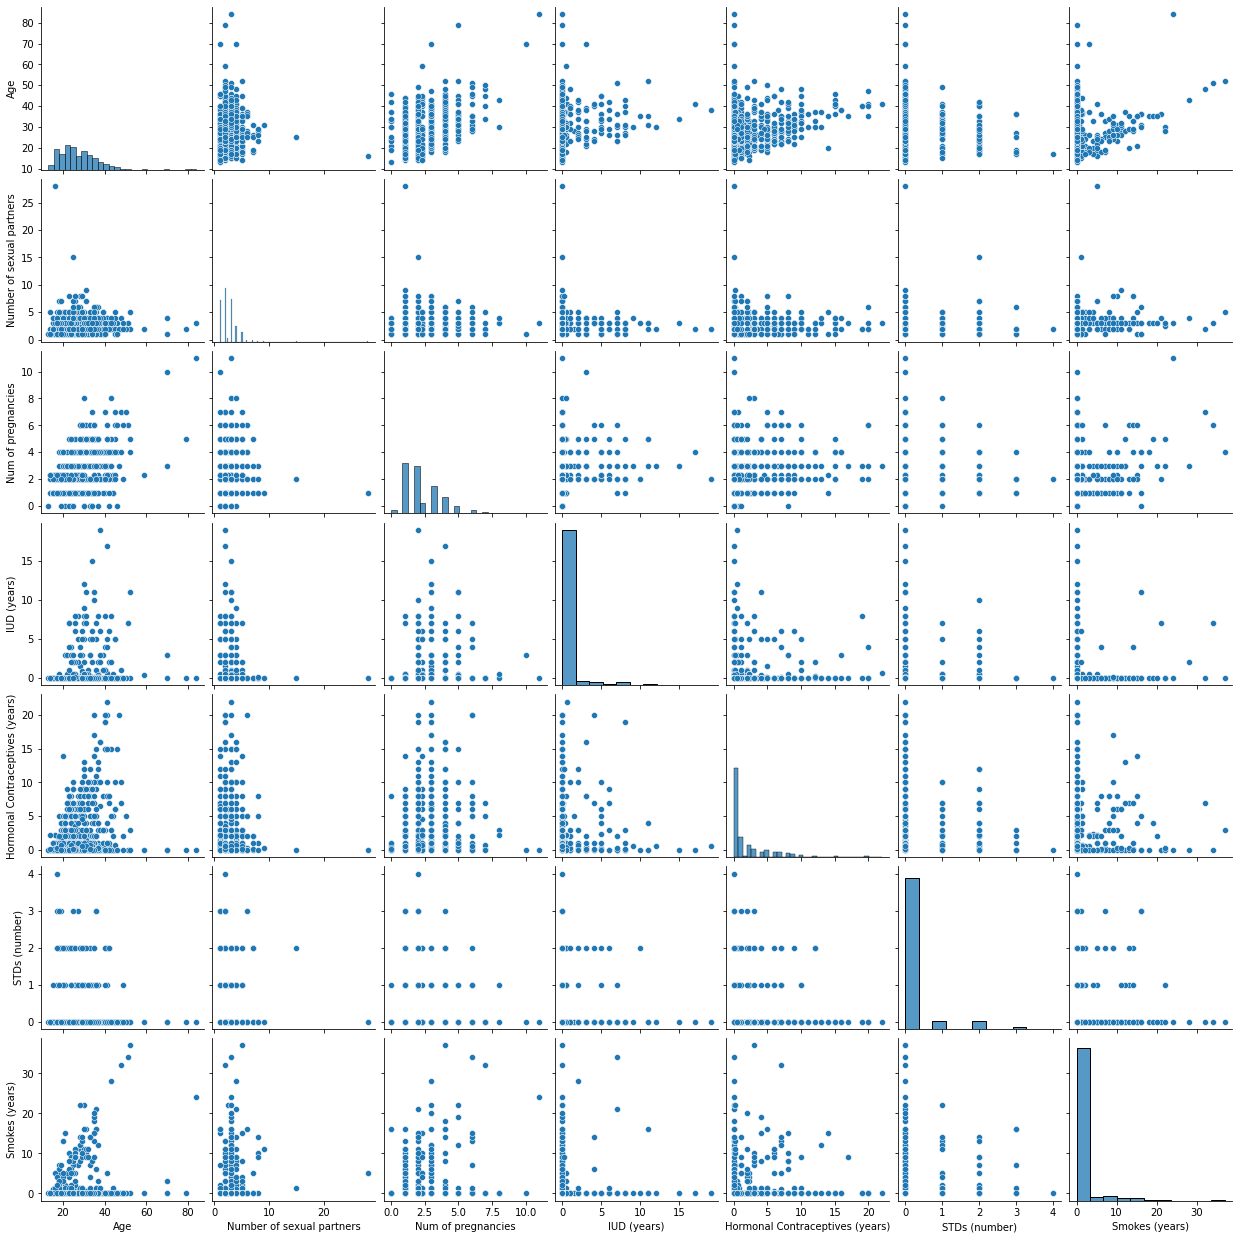

In [12]:
# Plot non-bool parameters
sns.pairplot(rf[['Age','Number of sexual partners','Num of pregnancies','IUD (years)',
                 'Hormonal Contraceptives (years)', 'STDs (number)', 'Smokes (years)']])

# Implement Oversampling

In [26]:
# locate all columns where Biopsy is 1
minority_class = rf.loc[rf['Biopsy'] == 1]

print("Minority class count before oversampling: \n{}\n".format(rf['Biopsy'].value_counts()))

# oversample with factor 12
minority_class = minority_class.sample(frac=12, replace=True, random_state=1)

# concat dataframes
frames = [rf, minority_class]
rf_oversampled = pd.concat(frames)

print("Minority class count after oversampling: \n{}".format(rf_oversampled['Biopsy'].value_counts()))

Minority class count before oversampling: 
False    699
True      53
Name: Biopsy, dtype: int64

Minority class count after oversampling: 
False    699
True     689
Name: Biopsy, dtype: int64


# Pivot table

In [14]:
group = 'Dx:Cancer'
column_ = 'Dx:HPV'
agg_function = np.mean 

pivot_sum=pd.pivot_table(rf,index=[group],values=[column_],aggfunc=agg_function)
pivot_sum=pivot_sum.reset_index()
pivot_sum

,Dx:Cancer,Dx:HPV
0,False,0.002725
1,True,0.888889


# Box plots

<AxesSubplot:>

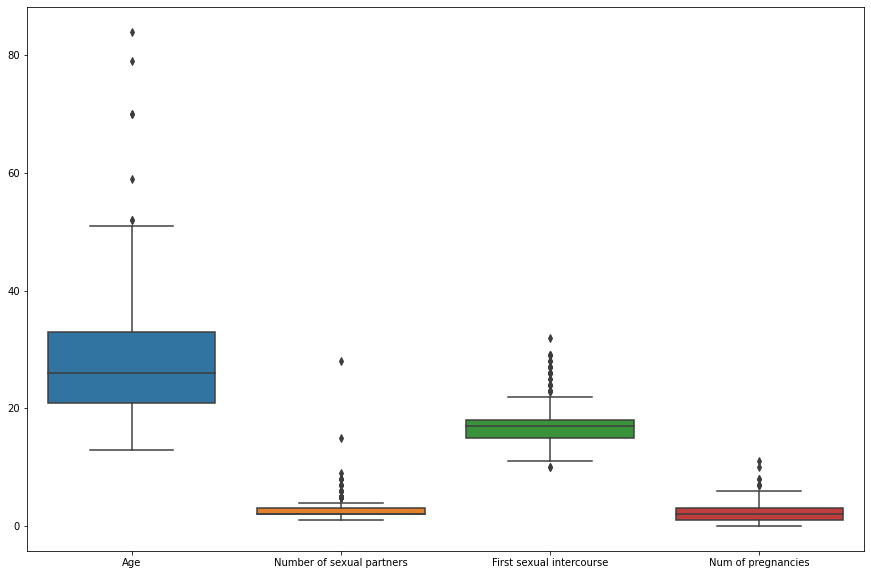

In [15]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=rf[rf.columns[0:4]])